In [4]:
# import library
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
# 1. Load dataset dari UCI
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)

In [6]:
# 2. Tambahkan nama kolom sesuai dokumentasi UCI
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]

In [8]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
# 3. Pisahkan antara fitur (X) dan target label (y)
X = df_wine.drop('Class label', axis=1)  # Semua fitur
y = df_wine['Class label']              # Label kelas

In [11]:
X.head(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [12]:
y

,Class label
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [13]:
# 4. Split dataset: 80% data latih, 20% data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# 5. Cetak bentuk (shape) dari masing-masing bagian
print("Jumlah data latih :", X_train.shape[0])
print("Jumlah data uji   :", X_test.shape[0])

Jumlah data latih : 142
Jumlah data uji   : 36


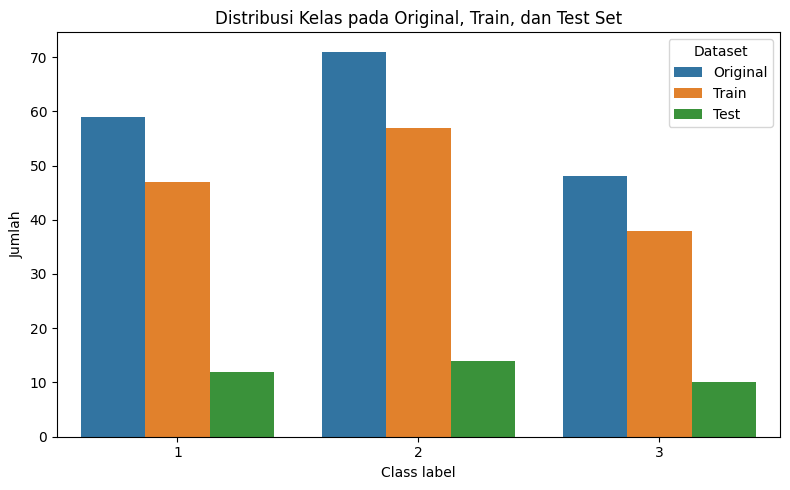

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]

# Split
X = df_wine.drop('Class label', axis=1)
y = df_wine['Class label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Gabungkan data label sebelum dan sesudah split untuk visualisasi
df_plot = pd.DataFrame({
    'Dataset': ['Original'] * len(y) + ['Train'] * len(y_train) + ['Test'] * len(y_test),
    'Class label': pd.concat([y, y_train, y_test])
})

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df_plot, x='Class label', hue='Dataset')
plt.title('Distribusi Kelas pada Original, Train, dan Test Set')
plt.xlabel('Class label')
plt.ylabel('Jumlah')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()
